<a href="https://colab.research.google.com/github/aryannuka/data-science/blob/main/Unit2Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install preliz
import preliz as pz
import numpy as np
import arviz as az
import pymc as pm

This was my prior because of my knowledge of Mbappe being a known and very successful soccer player I thought he would have 80 shots taken and 70 shots on target. I am not very knowledgable on soccer.

<Axes: >

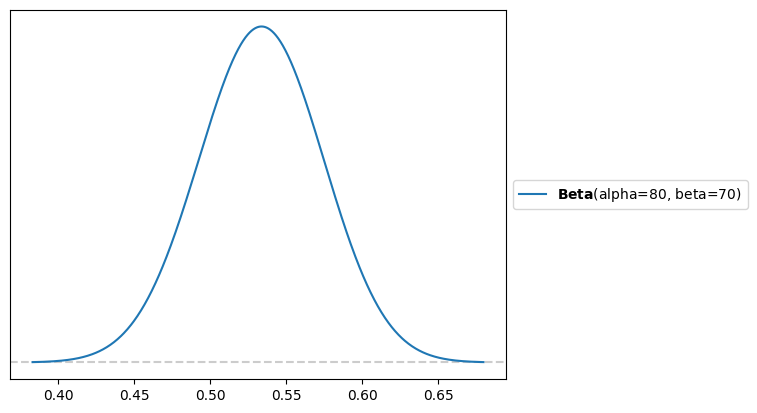

In [25]:
#This is for finding the prior data graph Shots Taken (alpha) to Shots on Target (beta)
pz.Beta(alpha=80,beta=70).plot_pdf()

In [26]:
#Mbappe's Shots to Shots on Target in the 2023/2024 season, shots taken then shots on target
SH_data_2324 = np.repeat([1,0], repeats = [43,20]) #shots taken

In [27]:
with pm.Model() as wmby_FT_2324_model:
  #same prior from before based on my knowledge of Mbappe being an amazing player
  θ = pm.Beta('θ' , alpha = 80. , beta = 70.)

  #same likelihood, with our stand in for the binomial distribution
  #but with the updated data
  y = pm.Bernoulli('y', p = θ, observed = SH_data_2324)

  #sample from the posterior, 2000 for a more precise picture later
  idata_SH_2324 = pm.sample(2000)

<Axes: title={'center': 'θ'}>

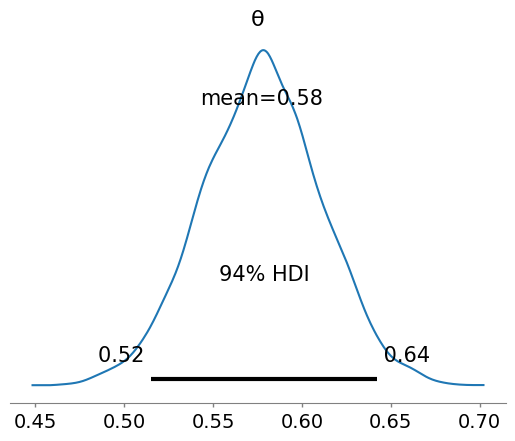

In [28]:
#vizualize the 2000 samples from the pymc model of the posterior
az.plot_posterior(idata_SH_2324)

This posterior graph shows Mbappe's average shot percentage is 58%. The likelihood for it being between 52% and 64% is around 94%. This matches my prediction. I made a predicted that his shooting ratio would be near 55%, knowing about him as an accomplished soccer player, so this didn't suprise me much. But, realizing that his shot percentage was better than what I expected does surprise me given the variance that can happen across the games.